# Process of results

First some imports

In [13]:
from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the `re-valdiation` folder:

In [2]:
input_directory = Path("./results/re-validation")
df = csv_reader.read_result_csv(
    input_directory,
    include=["validation_final_result.csv"],
    exclude=["checkpoint"]
)
# Error of interest
error_of_interest = "relRMSE"

Let's look at the initial result

In [3]:
df

,Sample,Seed,Type,Model,Loss,Encoding,Integrator,Activation,n_neurons,hidden_layers,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,42,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,3.931277e-07,0.001008,0.173908,0.222275,0.753575,0.314569,0.259725,0.279178,1.202980,0.428651
1,churyumov-gerasimenko,42,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,4.374184e-07,0.001121,0.637668,0.804605,2.361958,1.042478,0.744983,0.807288,2.540298,0.919402
2,churyumov-gerasimenko,42,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,6.857675e-07,0.001760,0.640293,0.803361,2.461589,1.137928,0.718200,0.779488,2.466088,0.894246
3,churyumov-gerasimenko,42,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,4.083237e-06,0.010481,0.796624,1.005606,2.740824,1.135028,0.997004,1.075181,3.300825,1.180816
4,churyumov-gerasimenko,42,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,5.477672e-06,0.014041,0.407337,0.547397,1.256760,0.571159,0.407148,0.448395,1.246455,0.459673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,churyumov-gerasimenko,1999,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,5.772403e-06,0.014793,0.411454,0.553439,1.268290,0.577373,0.409509,0.451484,1.252063,0.462633
2,churyumov-gerasimenko,1999,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,1.476027e-06,0.003782,0.689824,0.872586,2.514893,1.114889,0.829801,0.898301,2.823636,1.015227
3,churyumov-gerasimenko,1999,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,2.714962e-07,0.000696,0.634006,0.796107,2.431960,1.108598,0.711880,0.772940,2.461954,0.894427
4,churyumov-gerasimenko,1999,ACC,siren,normalized_L1_loss,direct_encoding,ACC_trap,AbsLayer,100,9,...,3.201663e-07,0.000820,0.145532,0.187446,0.708509,0.307387,0.210363,0.225712,1.121316,0.405338


And save the unmodified concatenated DataFrame to a file

In [4]:
output_directory = Path("./results/re-validation")
filename = "total_results.csv"
df.to_csv(output_directory.joinpath(filename))

# Processing and Data Visualization

First, we drop every parameter which is basically the same:

In [5]:
df = df.drop(["Model", "Encoding", "Integrator", "Activation", "n_neurons", "hidden_layers", "Batch Size", "LR", "Noise Params", "Target Sampler Method", "Integration Points", "c"], axis=1)

df

,Sample,Seed,Type,Loss,Ground Truth,Noise Method,Target Sampler Domain,Normalized L1 Loss@Altitude_0,Normalized Relative Component Loss@Altitude_0,RMSE@Altitude_0,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,42,ACC,normalized_L1_loss,polyhedral,gaussian,"[0.0, 1.0]",0.352316,0.350637,1.633509,...,3.931277e-07,0.001008,0.173908,0.222275,0.753575,0.314569,0.259725,0.279178,1.202980,0.428651
1,churyumov-gerasimenko,42,ACC,normalized_L1_loss,polyhedral,constant_bias,"[3.0, 5.0]",1.357437,1.345321,4.352900,...,4.374184e-07,0.001121,0.637668,0.804605,2.361958,1.042478,0.744983,0.807288,2.540298,0.919402
2,churyumov-gerasimenko,42,ACC,normalized_L1_loss,polyhedral,gaussian,"[1.0, 3.0]",0.773582,0.778324,2.551758,...,6.857675e-07,0.001760,0.640293,0.803361,2.461589,1.137928,0.718200,0.779488,2.466088,0.894246
3,churyumov-gerasimenko,42,ACC,normalized_L1_loss,polyhedral,gaussian,"[3.0, 5.0]",1.185944,1.192383,3.854965,...,4.083237e-06,0.010481,0.796624,1.005606,2.740824,1.135028,0.997004,1.075181,3.300825,1.180816
4,churyumov-gerasimenko,42,ACC,normalized_L1_loss,polyhedral,constant_bias,"[0.0, 1.0]",0.409472,0.408530,1.247367,...,5.477672e-06,0.014041,0.407337,0.547397,1.256760,0.571159,0.407148,0.448395,1.246455,0.459673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,churyumov-gerasimenko,1999,ACC,normalized_L1_loss,mascon,constant_bias,"[0.0, 1.0]",0.414392,0.411495,1.280363,...,5.772403e-06,0.014793,0.411454,0.553439,1.268290,0.577373,0.409509,0.451484,1.252063,0.462633
2,churyumov-gerasimenko,1999,ACC,normalized_L1_loss,mascon,gaussian,"[1.0, 3.0]",0.933791,0.932332,3.056634,...,1.476027e-06,0.003782,0.689824,0.872586,2.514893,1.114889,0.829801,0.898301,2.823636,1.015227
3,churyumov-gerasimenko,1999,ACC,normalized_L1_loss,mascon,constant_bias,"[3.0, 5.0]",0.836764,0.834097,3.141558,...,2.714962e-07,0.000696,0.634006,0.796107,2.431960,1.108598,0.711880,0.772940,2.461954,0.894427
4,churyumov-gerasimenko,1999,ACC,normalized_L1_loss,mascon,gaussian,"[0.0, 1.0]",0.226669,0.226659,0.854519,...,3.201663e-07,0.000820,0.145532,0.187446,0.708509,0.307387,0.210363,0.225712,1.121316,0.405338


Time to concentrate only on the relRMSE, for now:

In [6]:
interesting_columns = ["Sample", "Seed", "Loss", "Ground Truth", "Noise Method", "Target Sampler Domain"]

interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
df = df[interesting_columns]
df = df.fillna("None")
df

,Sample,Seed,Loss,Ground Truth,Noise Method,Target Sampler Domain,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,gaussian,"[0.0, 1.0]",0.546078,0.666804,0.433992,0.528932,0.221648,0.224786,0.188921,0.009534,0.005027,0.001008,0.314569,0.428651
1,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,constant_bias,"[3.0, 5.0]",1.443390,0.934005,0.850521,0.909136,0.739599,0.456218,0.235484,0.013157,0.005734,0.001121,1.042478,0.919402
2,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,gaussian,"[1.0, 3.0]",0.860623,1.063667,0.903557,0.943177,0.695647,0.423038,0.222765,0.016886,0.008566,0.001760,1.137928,0.894246
3,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,gaussian,"[3.0, 5.0]",1.308792,1.209598,1.199400,1.133373,1.264723,0.644099,0.345509,0.093172,0.049522,0.010481,1.135028,1.180816
4,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,constant_bias,"[0.0, 1.0]",0.415134,0.415153,0.425567,0.476281,0.552024,1.078322,0.662889,0.129791,0.069854,0.014041,0.571159,0.459673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,constant_bias,"[0.0, 1.0]",0.424308,0.416342,0.423896,0.483497,0.554940,1.084359,0.716134,0.132717,0.071485,0.014793,0.577373,0.462633
2,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,gaussian,"[1.0, 3.0]",1.018234,1.343614,1.032351,0.989347,1.217794,0.491472,0.239600,0.034119,0.017731,0.003782,1.114889,1.015227
3,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,constant_bias,"[3.0, 5.0]",1.013392,0.904816,1.056902,0.754545,0.676521,0.478084,0.211659,0.009398,0.003846,0.000696,1.108598,0.894427
4,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,gaussian,"[0.0, 1.0]",0.284077,0.344593,0.250357,0.217822,0.201010,0.166491,0.098295,0.008392,0.004083,0.000820,0.307387,0.405338


Time to replace the altitudes and make them more readable:

In [7]:
ALTITUDES = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df

,sample,Seed,Loss,Ground Truth,Noise Method,sample_domain,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,gaussian,"[0.0, 1.0]",0.546078,0.666804,0.433992,0.528932,0.221648,0.224786,0.188921,0.009534,0.005027,0.001008,0.314569,0.428651
1,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,constant_bias,"[3.0, 5.0]",1.443390,0.934005,0.850521,0.909136,0.739599,0.456218,0.235484,0.013157,0.005734,0.001121,1.042478,0.919402
2,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,gaussian,"[1.0, 3.0]",0.860623,1.063667,0.903557,0.943177,0.695647,0.423038,0.222765,0.016886,0.008566,0.001760,1.137928,0.894246
3,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,gaussian,"[3.0, 5.0]",1.308792,1.209598,1.199400,1.133373,1.264723,0.644099,0.345509,0.093172,0.049522,0.010481,1.135028,1.180816
4,churyumov-gerasimenko,42,normalized_L1_loss,polyhedral,constant_bias,"[0.0, 1.0]",0.415134,0.415153,0.425567,0.476281,0.552024,1.078322,0.662889,0.129791,0.069854,0.014041,0.571159,0.459673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,constant_bias,"[0.0, 1.0]",0.424308,0.416342,0.423896,0.483497,0.554940,1.084359,0.716134,0.132717,0.071485,0.014793,0.577373,0.462633
2,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,gaussian,"[1.0, 3.0]",1.018234,1.343614,1.032351,0.989347,1.217794,0.491472,0.239600,0.034119,0.017731,0.003782,1.114889,1.015227
3,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,constant_bias,"[3.0, 5.0]",1.013392,0.904816,1.056902,0.754545,0.676521,0.478084,0.211659,0.009398,0.003846,0.000696,1.108598,0.894427
4,churyumov-gerasimenko,1999,normalized_L1_loss,mascon,gaussian,"[0.0, 1.0]",0.284077,0.344593,0.250357,0.217822,0.201010,0.166491,0.098295,0.008392,0.004083,0.000820,0.307387,0.405338


In [14]:
unit_conversion.convert_altitude("churyumov-gerasimenko", np.array(ALTITUDES))

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [8]:
df = df.drop(
    ["sample", "Seed", f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df.groupby(["sample_domain", "Noise Method", "Ground Truth"]).mean()

0.001     0.005      0.01  \
sample_domain Noise Method  Ground Truth                                 
[0. 1.]       None          mascon        0.290320  0.171167  0.085681   
                            polyhedral    0.254436  0.190319  0.120878   
              constant_bias mascon        0.426071  0.421366  0.425060   
                            polyhedral    0.419526  0.417084  0.421803   
              gaussian      mascon        0.584416  0.432309  0.428459   
                            polyhedral    0.402755  0.398825  0.375014   
[1. 3.]       None          mascon        1.066550  0.994835  0.862034   
                            polyhedral    0.989933  0.921804  0.955381   
              constant_bias mascon        1.191184  0.900181  0.730798   
                            polyhedral    0.981011  1.043578  0.806509   
              gaussian      mascon        1.132183  1.391927  1.140753   
                            polyhedral    1.134133  1.246279  1.152343   
[3. 5.]       None          mascon        0.914780  1.010222  0.848796   
                            polyhedral    1.043487  0.994419  0.942126   
              constant_bias mascon        0.951147  0.888879  0.896563   
                            polyhedral    1.044533  0.918977  0.901381   
              gaussian      mascon        1.128371  1.349500  1.116916   
                            polyhedral    1.294152  1.265568  1.267070   

                                              0.05       0.1       0.5  \
sample_domain Noise Method  Ground Truth                                 
[0. 1.]       None          mascon        0.024177  0.012981  0.009732   
                            polyhedral    0.023516  0.015107  0.012638   
              constant_bias mascon        0.480045  0.552602  1.147598   
                            polyhedral    0.472485  0.549680  1.089474   
              gaussian      mascon        0.260594  0.225019  0.239453   
                            polyhedral    0.299670  0.176910  0.158442   
[1. 3.]       None          mascon        0.742108  0.890212  0.277695   
                            polyhedral    0.891507  1.013741  0.281761   
              constant_bias mascon        0.735566  0.605555  0.343744   
                            polyhedral    0.669908  0.635576  0.332573   
              gaussian      mascon        1.095986  1.173913  0.609296   
                            polyhedral    1.126031  1.032712  0.733712   
[3. 5.]       None          mascon        0.774249  0.867605  0.304138   
                            polyhedral    0.860673  0.806422  0.300729   
              constant_bias mascon        0.845879  0.872784  0.456041   
                            polyhedral    0.843694  0.946379  0.448932   
              gaussian      mascon        1.044710  1.079918  0.608134   
                            polyhedral    1.194501  1.256605  0.725615   

                                               1.0       5.0      10.0  \
sample_domain Noise Method  Ground Truth                                 
[0. 1.]       None          mascon        0.007507  0.000565  0.000273   
                            polyhedral    0.009053  0.000637  0.000302   
              constant_bias mascon        0.700860  0.131401  0.070601   
                            polyhedral    0.709250  0.131049  0.069929   
              gaussian      mascon        0.115896  0.008336  0.004078   
                            polyhedral    0.132537  0.007768  0.003968   
[1. 3.]       None          mascon        0.012588  0.000310  0.000162   
                            polyhedral    0.013580  0.000304  0.000154   
              constant_bias mascon        0.060474  0.002343  0.001153   
                            polyhedral    0.062055  0.002871  0.001437   
              gaussian      mascon        0.349155  0.073254  0.038251   
                            polyhedral    0.412522  0.081271  0.043536   
[3. 5.]       None          mascon        0.025

Time for plotting. First make the DataFrame wide

In [9]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["sample_domain", "Noise Method", "Ground Truth"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,Noise Method,Ground Truth,distance,relRMSE
0,[0. 1.],gaussian,polyhedral,0.001,0.546078
1,[3. 5.],constant_bias,polyhedral,0.001,1.443390
2,[1. 3.],gaussian,polyhedral,0.001,0.860623
3,[3. 5.],gaussian,polyhedral,0.001,1.308792
4,[0. 1.],constant_bias,polyhedral,0.001,0.415134
...,...,...,...,...,...
895,[0. 1.],constant_bias,mascon,50.000,0.014793
896,[1. 3.],gaussian,mascon,50.000,0.003782
897,[3. 5.],constant_bias,mascon,50.000,0.000696
898,[0. 1.],gaussian,mascon,50.000,0.000820


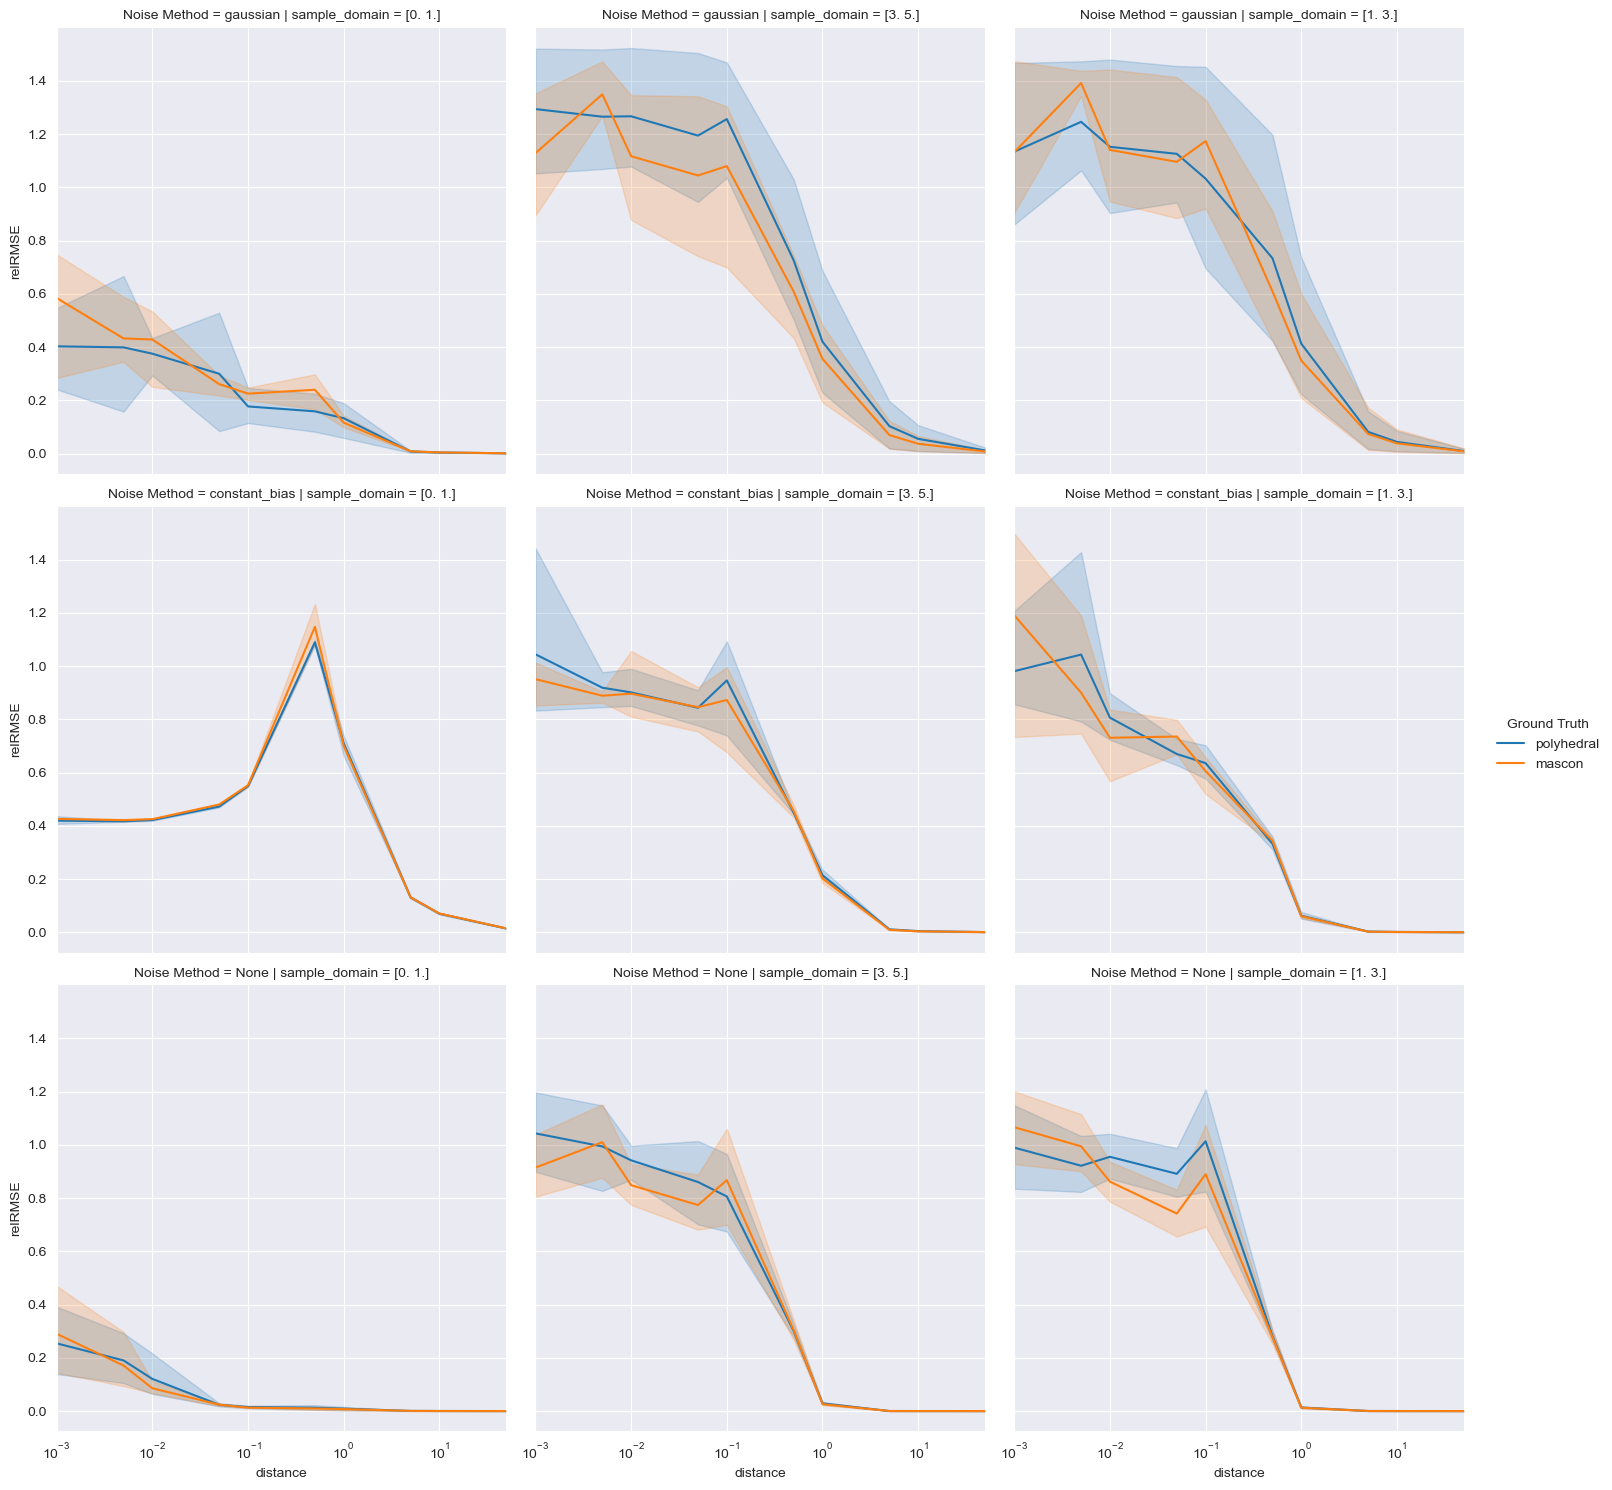

In [10]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="sample_domain", row="Noise Method",
    hue="Ground Truth"
)
g.set(xlim=(0.0, 50.0), xscale='log')
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = Path(f"./results/re-validation/norm_{error_of_interest}_line.png")
# g.savefig(save_path, dpi=300)

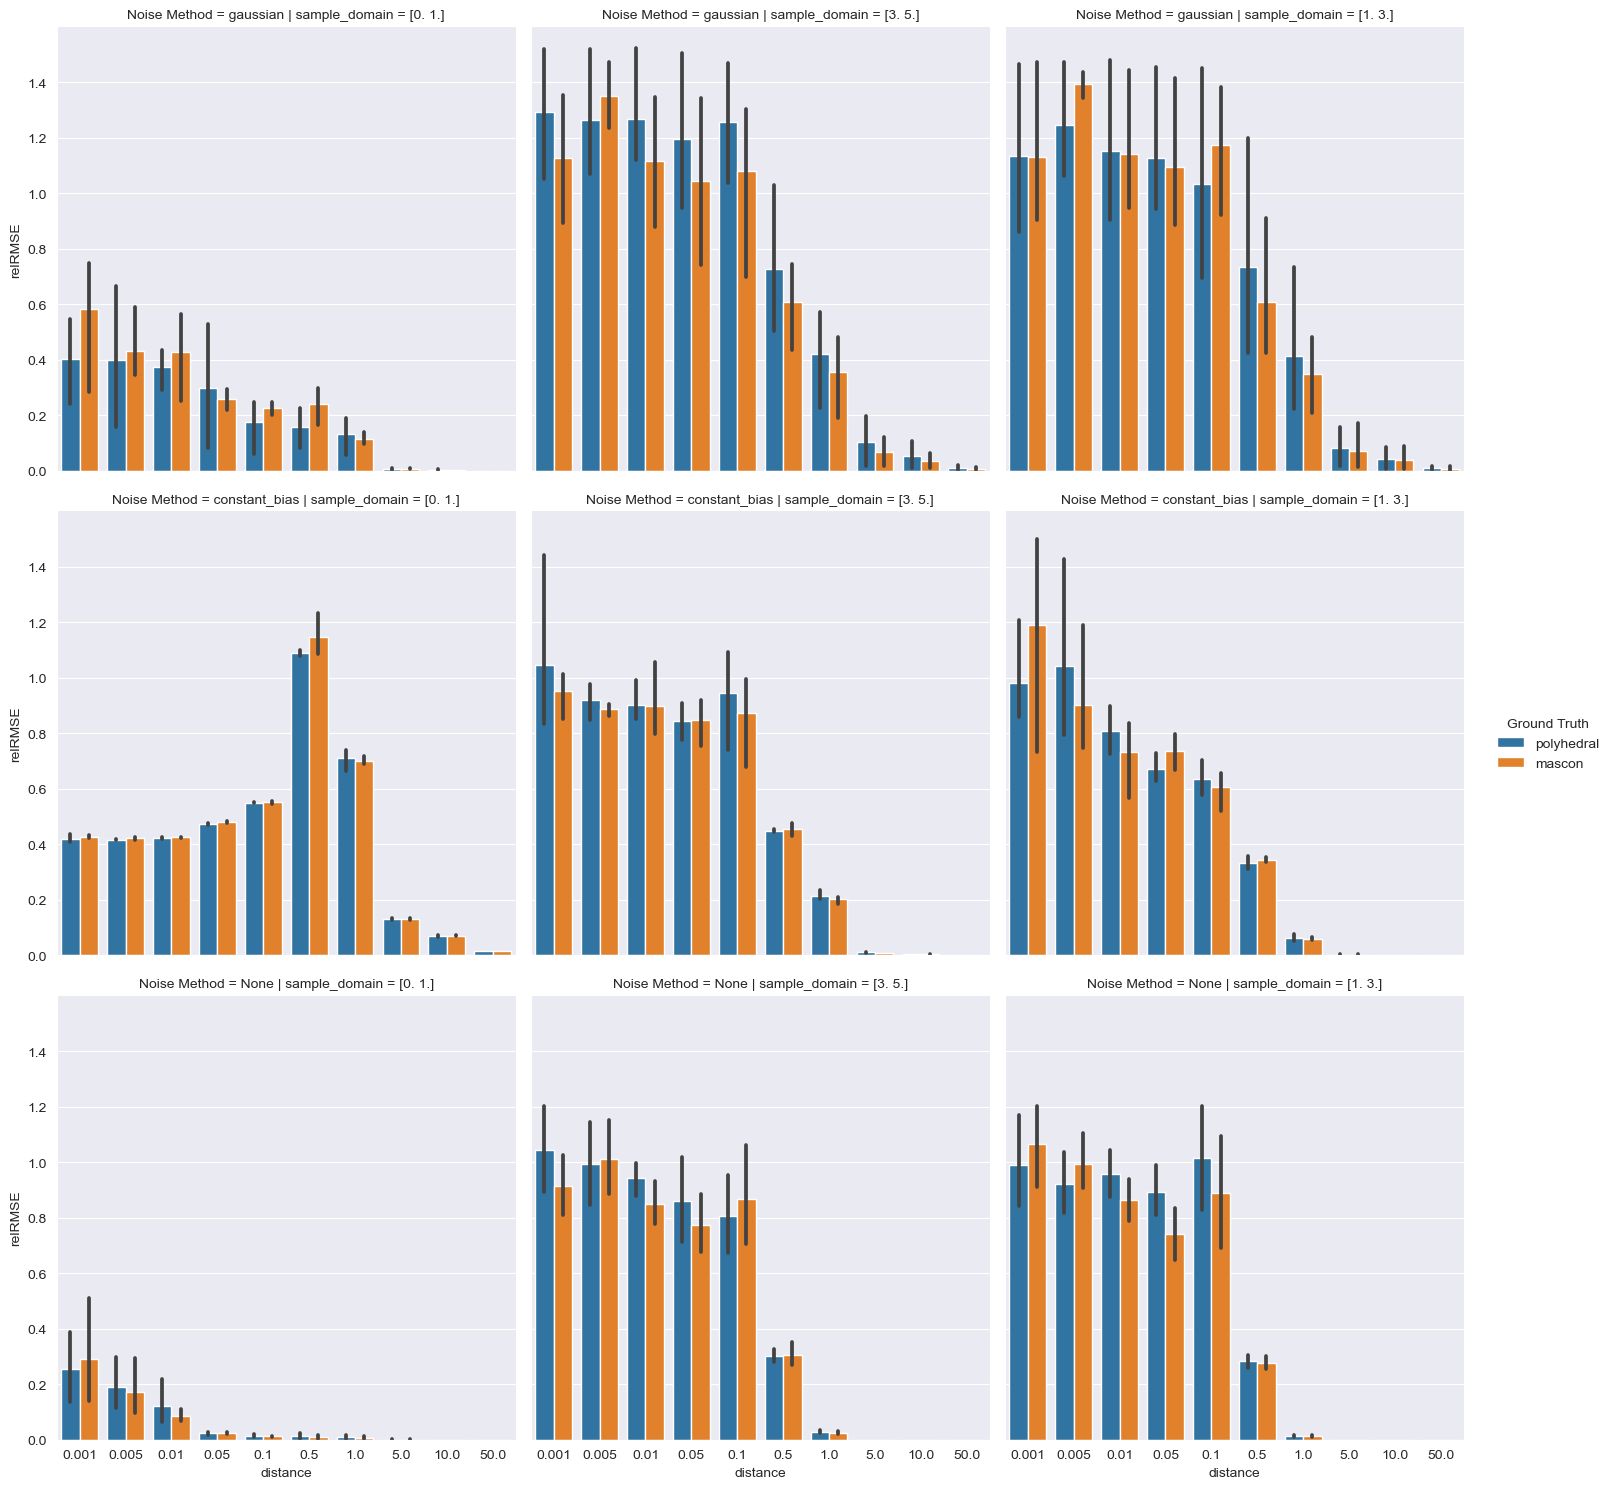

In [11]:
g = sns.catplot(
    data=dfm, kind="bar",
    x="distance", y=error_of_interest, col="sample_domain", row="Noise Method",
    hue="Ground Truth"
)
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = Path(f"./results/re-validation/norm_{error_of_interest}_bar.png")
# g.savefig(save_path, dpi=300)